In [9]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P2\Covid-19\Rapport' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
5,2020-03-30,France,43022.0,40174.0,2715.0,2606.0,2848.0,109.0
6,2020-03-30,China,82601.0,82463.0,3308.0,3311.0,138.0,-3.0
7,2020-03-30,Italy,99266.0,97689.0,11095.0,10781.0,1577.0,314.0
8,2020-03-30,Spain,81599.0,78797.0,6594.0,6528.0,2802.0,66.0
9,2020-03-30,United States,148230.0,143025.0,2840.0,2509.0,5205.0,331.0


In [11]:
list_country = ["France","China","Italy","Spain","United States"]


def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])] 
    this_graf = plt.plot(df["date"], df[f"total_{subject}_predict"], 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], df[f"total_{subject}_real"], color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    return this_graf

def visShow(country):
    f1 = plt.figure()
    ax1 = f1.add_subplot(111)
    v = visFollow(f"{country}","cases")
    f2 = plt.figure()
    ax2 = f2.add_subplot(122)
    v = visFollow(f"{country}","deaths")

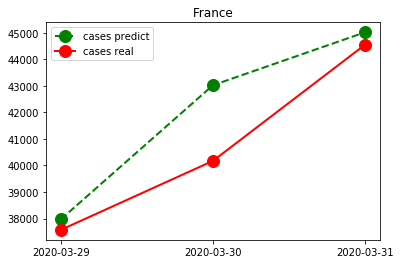

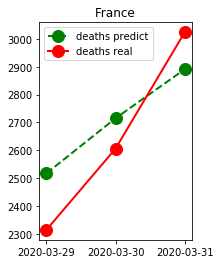

In [12]:
visShow("France")

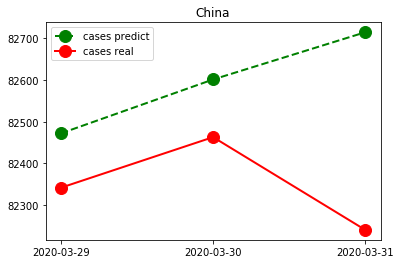

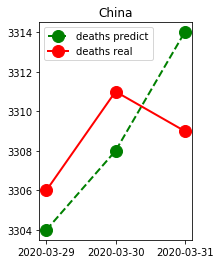

In [13]:
visShow("China")

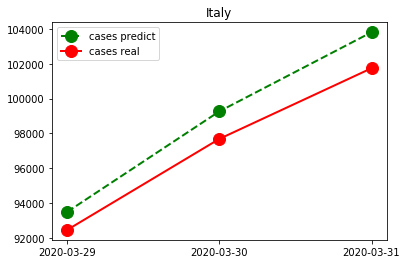

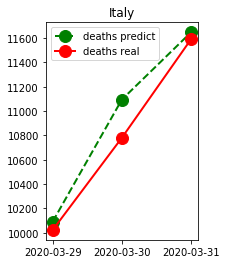

In [14]:
visShow("Italy")

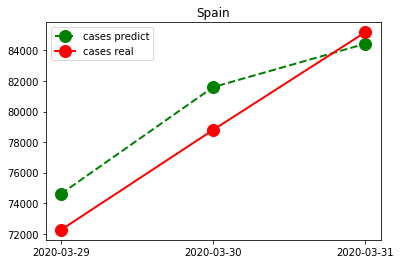

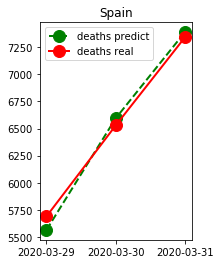

In [15]:
visShow("Spain")

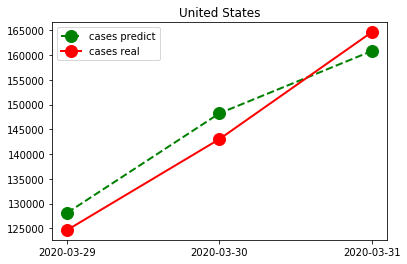

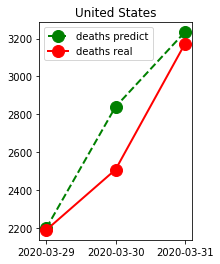

In [16]:
visShow("United States")